# Sales Prediction using Python

Sales of an item depends upon factors such as the amount you spend to advertise your product, the segment of people you advertise for, or the platform you are advertising on about your product. Here, we have used linear regression algorithm to train our model in order to perform sales prediction.

## 1. Importing the libraries

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Importing the dataset

In [33]:
df = pd.read_csv("/kaggle/input/advertisingcsv/Advertising.csv" )

In [34]:
df.head(200)

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


## 3. Clean the data

In [35]:
#Remove unwanted columns
df=df.drop(columns=["Unnamed: 0"])

In [36]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

No null values are present, hence no further actions taken.

In [37]:
df.head(100)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
95,163.3,31.6,52.9,16.9
96,197.6,3.5,5.9,11.7
97,184.9,21.0,22.0,15.5
98,289.7,42.3,51.2,25.4


## 4. Training the model

In [38]:
x=df.iloc[:,0:-1]
x

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [39]:
y=df.iloc[:,-1]
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: Sales, Length: 200, dtype: float64

In [40]:
#Splitting the data into training and test data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [41]:
x_train=x_train.astype(int)
y_train=y_train.astype(int)
x_test=x_test.astype(int)
y_test=y_test.astype(int)

In [42]:
from sklearn.preprocessing import StandardScaler
Sc=StandardScaler()
x_train_scaled=Sc.fit_transform(x_train)
x_test_scaled=Sc.fit_transform(x_test)

In [43]:
#Training the model
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train_scaled,y_train)


LinearRegression()

## 5. Testing the model

In [44]:
y_pred=lr.predict(x_test_scaled)

In [45]:
y_pred

array([10.5868815 ,  8.05105808,  7.65439776, 24.16768785, 12.40168434,
        7.14011725, 13.21321881, 15.45686741, 11.39058025, 16.65954695,
       22.96066063,  9.62490848, 10.89720428, 15.85780054, 12.0266064 ,
       12.59716927, 19.0302851 , 11.27855261, 16.29377152, 17.53908741,
       24.2344939 , 10.01766382, 15.49173425, 12.83353019,  6.45327938,
       15.59177142, 12.79546407, 21.19925958, 13.80099929,  9.60693606,
       13.37491218, 21.5846153 , 18.26411539, 21.39767629,  7.16866039,
        6.85975561,  8.58013508, 13.35989764, 15.09971037,  6.95730337])

## 6. Calculate the accuracy of the model

In [46]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)*100

83.03910270450665

## 7.Visualization

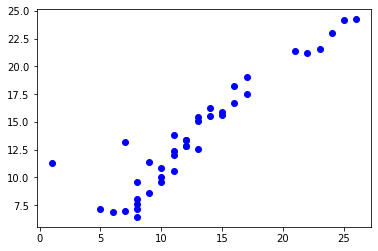

In [47]:
plt.scatter(y_test,y_pred,c='b')